1 Analysis tasks
python_analysis_practice_2
July 14, 2020
In the following analysis tasks, we are going to use a data set on incidences of forest fires in the north east of Portugal. You can find a description of the dataset here.

1.1 Read data
• Import the pandas and numpy packages.

In [1]:
import pandas as pd
import numpy as np

• Now read the file forestfires.csv and look at the first few rows.

In [2]:
forest_fires = pd.read_csv("data/forestfires.csv")

In [3]:
forest_fires.shape

(517, 8)

In [4]:
forest_fires.columns

Index(['X', 'Y', 'month', 'day', 'temp', 'wind', 'rain', 'area'], dtype='object')

• Have a look at the methods available on a pandas dataframe.
– We’ve already seen describe(), so run that on the dataframe you loaded above. – Run another method providing general information on the stored data.

In [5]:
forest_fires.describe()

,X,Y,temp,wind,rain,area
count,517.000000,517.000000,515.000000,516.000000,517.000000,379.000000
mean,4.669246,4.299807,18.904272,4.019380,0.021663,17.525198
std,2.313778,1.229900,5.801947,1.792934,0.295959,73.818628
min,1.000000,2.000000,2.200000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,15.550000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,19.300000,4.000000,0.000000,2.570000
75%,7.000000,5.000000,22.800000,4.900000,0.000000,9.985000
max,9.000000,9.000000,33.300000,9.400000,6.400000,1090.840000


In [8]:
forest_fires.head()

,X,Y,month,day,temp,wind,rain,area
0,7,5,mar,fri,8.2,6.7,0.0,NaN
1,7,4,oct,tue,18.0,0.9,0.0,NaN
2,7,4,oct,sat,14.6,1.3,0.0,NaN
3,8,6,mar,fri,8.3,4.0,0.2,NaN
4,8,6,mar,sun,11.4,1.8,0.0,NaN


1.2 Missing data
• Which variables having missing data in this data frame?
– Replace all the missing values in area with 0
– Remove the rows that have missing values in other columns

In [9]:
forest_fires.isna().sum()

X          0
Y          0
month      0
day        0
temp       2
wind       1
rain       0
area     138
dtype: int64

In [10]:
forest_fires.fillna({"area" : 0}, inplace = True)

In [11]:
forest_fires.isna().sum()

X        0
Y        0
month    0
day      0
temp     2
wind     1
rain     0
area     0
dtype: int64

In [23]:
forest_fires.dropna(inplace = True)

In [24]:
forest_fires.isna().sum()

X        0
Y        0
month    0
day      0
temp     0
wind     0
rain     0
area     0
dtype: int64

1.3 Using the “Verbs”
1.3.1 Select
• Change your data frame so that columns X and Y are dropped. 

In [28]:
forest_fires_dropped = forest_fires.drop(["X", "Y"], axis = 1)
forest_fires_dropped

,month,day,temp,wind,rain,area
0,mar,fri,8.2,6.7,0.0,0.00
1,oct,tue,18.0,0.9,0.0,0.00
2,oct,sat,14.6,1.3,0.0,0.00
3,mar,fri,8.3,4.0,0.2,0.00
4,mar,sun,11.4,1.8,0.0,0.00
...,...,...,...,...,...,...
512,aug,sun,27.8,2.7,0.0,6.44
513,aug,sun,21.9,5.8,0.0,54.29
514,aug,sun,21.2,6.7,0.0,11.16
515,aug,sat,25.6,4.0,0.0,0.00


1.3.2 Arrange
• Change your data frame so that it is arranged by area, so that the highest area fires are first 

In [30]:
forest_fires_dropped.sort_values("area", ascending= False, inplace= True)
forest_fires_dropped

,month,day,temp,wind,rain,area
238,sep,sat,25.1,4.0,0.0,1090.84
415,aug,thu,27.5,4.9,0.0,746.28
479,jul,mon,22.6,4.9,0.0,278.53
237,sep,tue,18.8,2.2,0.0,212.88
236,sep,sat,18.2,1.8,0.0,200.94
...,...,...,...,...,...,...
51,aug,sun,21.5,2.2,0.0,0.00
50,sep,thu,20.8,1.3,0.0,0.00
49,mar,mon,11.0,5.8,0.0,0.00
48,mar,mon,11.8,1.8,0.0,0.00


1.3.3 Filter
• Change your data frame so that it contains no rows where area is zero.

In [31]:
forest_fires_dropped = forest_fires_dropped.loc[forest_fires_dropped["area"] != 0]

In [32]:
forest_fires_dropped

,month,day,temp,wind,rain,area
238,sep,sat,25.1,4.0,0.0,1090.84
415,aug,thu,27.5,4.9,0.0,746.28
479,jul,mon,22.6,4.9,0.0,278.53
237,sep,tue,18.8,2.2,0.0,212.88
236,sep,sat,18.2,1.8,0.0,200.94
...,...,...,...,...,...,...
439,sep,fri,19.1,2.2,0.0,0.33
251,aug,wed,24.0,3.1,0.0,0.24
252,aug,wed,22.1,3.6,0.0,0.21
266,aug,tue,19.4,4.0,0.0,0.17


1.3.4 Mutate
• Create a new column is_rain, which is equal to True whenever rain is greater than zero and False otherwise.

In [ ]:
df.assign(temp_f=lambda x: x.temp_c * 9 / 5 + 32)
df.groupby('group').assign(mean_var1 = lambda x: np.mean(x.var1)

In [39]:
forest_fires_dropped = forest_fires_dropped.assign(is_rain = lambda x: x.rain > 0)
forest_fires_dropped

,month,day,temp,wind,rain,area,is_rain
238,sep,sat,25.1,4.0,0.0,1090.84,False
415,aug,thu,27.5,4.9,0.0,746.28,False
479,jul,mon,22.6,4.9,0.0,278.53,False
237,sep,tue,18.8,2.2,0.0,212.88,False
236,sep,sat,18.2,1.8,0.0,200.94,False
...,...,...,...,...,...,...,...
439,sep,fri,19.1,2.2,0.0,0.33,False
251,aug,wed,24.0,3.1,0.0,0.24,False
252,aug,wed,22.1,3.6,0.0,0.21,False
266,aug,tue,19.4,4.0,0.0,0.17,False


In [40]:
forest_fires_dropped["is_rain"].unique()

array([False,  True])

1.3.5 Group by and summarise
• Find the average area of fire:
– In each month of the year
– In each day of the week
– When there is rain, and when there isn’t rain

In [41]:
forest_fires_dropped.groupby("month")["area"].mean()

month
apr    20.005000
aug    23.441939
dec    13.330000
feb    12.550000
jul    25.546111
jun    12.412500
mar    12.382105
may    38.480000
oct    19.914000
sep    31.815773
Name: area, dtype: float64

In [42]:
forest_fires_dropped.groupby("day")["area"].mean()

day
fri    10.400930
mon    18.116154
sat    51.068095
sun    20.424043
thu    32.164516
tue    22.438611
wed    18.642581
Name: area, dtype: float64

In [43]:
forest_fires_dropped.groupby("is_rain")["area"].mean()

is_rain
False    24.825393
True      6.495000
Name: area, dtype: float64

1.4 Plotting
• Use matplotlib to create a histogram of area
• Use seaborn to create a histogram of area
• Use seaborn to create a scatter plot of temp vs. area

In [44]:
%matplotlib inline

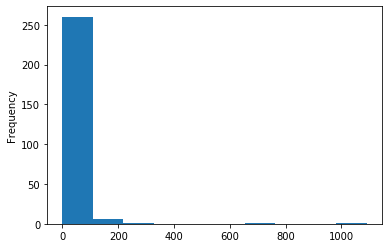

In [45]:
forest_fires_dropped["area"].plot(kind = "hist")

In [46]:
import seaborn as sns

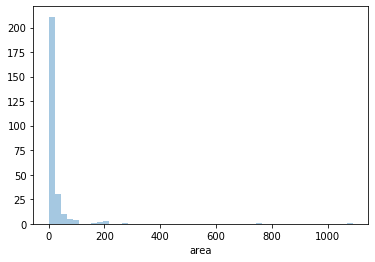

In [49]:
sns.distplot(forest_fires_dropped["area"], kde = False)

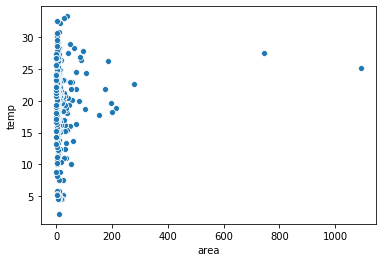

In [50]:
sns.scatterplot(x = "area", y = "temp", data = forest_fires_dropped)